# PLANT TRAITS 2024 - Exploración de datos

En este primer script lo que se pretende realizar es una exploración de los datos disponibles para que, de acuerdo a lo investigado anteriormente, podamos asegurar que contamos con data precisa y óptima para el comienzo del proyecto. Para poder realizar esto, intentaré responder las preguntas que se plantean como las mejores para el análisis de la data disponible. Las preguntas son las siguientes:

1. Haz el conteo del número de registros que tienes - ¿es lo que esperabas?
2. Busca los valores nulos - ¿Cómo lidiar con ellos?
3. Verifica el tipo de distribución de cada columna - ¿Éstos hacen match con la distribución esperada?
4. Busca outliers - ¿Hay anomalias en la data, todos los valores son válidos?
5. Valida si tu data está balanceada - ¿Hay diferentes grupos que representan todo el conjunto de datos, hay suficientes ejemplos de cada uno de estos grupos
6. ¿Existen sesgos en tu data? -¿Hay subgrupos que tratas de manera más favorable que otros?
7. Para valores NA o NULL, en vez de eliminar aquellos registros que los contengan, mejor es sustituirlos por un valor apropiado: por ejemplo, para variables continuas, se puede utilizar la moda, media o mediana; para variables categóricas, se puede utilizar la moda o una nueva categoría (por ejemplo “NA”)
8. Verificar si el modelo es robusto o sensible a outliers

A partir de los resultados obtenidos de responder las preguntas es que daré un juicio final sobre los datos.

In [17]:
#Librerias generales a utilizar

#Libreria donde tenemos las funciones generales de este libro
import functions.general_functions as gf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Pregunta 1 - Conteo de registros

La pregunta en específico que se pretende responder en este punto es la siguiente: **_Haz el conteo del número de registros que tienes - ¿es lo que esperabas?_**

De primera instancia, podemos decir que se tienen dos tipos de datos disponibles: archivos CSV e imágenes en formato JPEG. Las imágenes se encuentran en dos carpetas, uno de entrenamiento y otro de prueba, la carpeta de entrenamiento contiene un total de 55,523 imágenes, mientras que la carpeta de prueba contiene un total de 13,907 imágenes, con esto, contamos con un **total de 69,430 imágenes de plantas en formato JPEG**.

Aquí no se va a realizar el conteo mediante alguna rutina debido a que el número de imágenes es muy grande y la memoria de este libro de Jupyter no alcanza para poder procesar todas las imágenes en una sola rutina de conteo. Para el conteo de registros en los archivos CSV se realizará lo siguiente:

In [3]:
#Obtenemos la ruta de los archivos CSV
ruta_archivos = gf.get_data_path('csv')
nombre_archivo = 'train.csv'
nombre_archivo_t = 'test.csv'

#Leemos el archivo csv
df_train = pd.read_csv(ruta_archivos + nombre_archivo)
df_test = pd.read_csv(ruta_archivos + nombre_archivo_t)

#Obtenemos el número de registros para cada tabla
num_reg_train = str(df_train.shape[0])
num_reg_test = str(df_test.shape[0])
num_reg_total = str(df_train.shape[0] + df_test.shape[0])

#Imprimimos los totales
print('El conjunto/tabla de entrenamiento contiene un total de ' + num_reg_train + ' registros')
print('El conjunto/tabla de prueba contiene un total de ' + num_reg_test + ' registros')
print('En total, se cuenta con ' + num_reg_total + ' registros')

El conjunto/tabla de entrenamiento contiene un total de 55489 registros
El conjunto/tabla de prueba contiene un total de 13873 registros
En total, se cuenta con 69362 registros


De lo anterior, podemos obtener las siguientes conclusiones:

1. Para el conjunto de entrenamiento, se tienen 55,523 imágenes y 55,489 registros en su archivo CSV por lo que sugiere que para algunas fotos (34) no se tiene su respectiva información dentro del archivo CSV
2. Para el conjunto de prueba, se tienen 13,907 imágenes y 13,873 registros en su archivo CSV por lo que sugiere que para algunas fotos (34) no se tiene su respectiva información dentro del archivo CSV
3. En total, se tiene un total de 68 registros menos en CSV que en imágenes.

De manera general, podemos decir que **el volúmen de los datos si es lo esperado**, es un volúmen grande que nos ayudará a hacer un mejor entrenamiento del modelo. El número de registros faltantes en verdad es muy poco (0.001%) comparado con el total de registros que si se tienen, por lo que no representa una amenaza para el proyecto. En este punto la data se encuentra perfecto.

## Pregunta 2 - Valores nulos

La pregunta en específico que se pretende responder en este punto es la siguiente: **_Busca los valores nulos - ¿Cómo lidiar con ellos?_**

De primera instancia, para el conjunto de imágenes sabemos que no existen valores nulos ya que son imágenes y no existe algo como "imagen nula", aquí simplemente se revisa si se tiene la imagen o no. Por otro lado, dentro de los archivos CSV si pueden llegar a existir valores nulos, por lo que se realizará la investigación pertinente.

In [4]:
#Se pretende desplegar una tabla final con el nombre de las columnas, el tipo de cada columna y el número de sus registros nulos, 
#esto para cada conjunto (entrenamiento y prueba)

#Obtenemos los nombres de las columnas en una lista para cada conjunto de datos
col_train = list(df_train.columns)
col_test = list(df_test.columns)

#Proceso para obtener el número de registros null y el tipo de dato para cada columna
#Creamos listas nulas para ir guardando los números
num_nulls_train = []
num_nulls_test = []
type_train = []
type_test = []
#Hacemos el loop para ir guardando los números del conj de entrenamiento
for x in col_train:
    #Obtenemos el número de registros null
    num_nulls = df_train[x].isnull().sum()
    #Guardamos el número en la lista
    num_nulls_train.append(num_nulls)
    #Obtenemos el tipo de dato en la columna
    type_data = str(df_train[x].dtypes)
    #Guardamos el tipo de dato en la lista
    type_train.append(type_data)
#Hacemos el loop para ir guardando los números del conj de prueba
for y in col_test:
    #Obtenemos el número de registros null
    num_nulls = df_test[y].isnull().sum()
    #Guardamos el número en la lista
    num_nulls_test.append(num_nulls)
    #Obtenemos el tipo de dato en la columna
    type_data = str(df_test[y].dtypes)
    #Guardamos el tipo de dato en la lista
    type_test.append(type_data)

#Creamos lista que denota el tipo de conjunto de datos
tipo_train = ['train'] * len(col_train)
tipo_test = ['test'] * len(col_test)

#Creamos el diccionario para el conj de entrenamiento para después convertirlo en df
dic_train = {'type':tipo_train,'columns':col_train,'data_type':type_train,'num_nulls':num_nulls_train}
#Creamos el diccionario para el conj de prueba para después convertirlo en df
dic_test = {'type':tipo_test,'columns':col_test,'data_type':type_test,'num_nulls':num_nulls_test}

#Creamos el df para el conj de entrenamiento
df_col_train = pd.DataFrame(dic_train)
#Creamos el df para el conj de prueba
df_col_test = pd.DataFrame(dic_test)

#Unimos ambos dfs
df_cols = pd.concat([df_col_train,df_col_test], ignore_index = True)

#Obtenemos aquellos registros con num_nulls > 0
df_cols[df_cols['num_nulls'] > 0]

,type,columns,data_type,num_nulls
170,train,X4_sd,float64,16341
171,train,X11_sd,float64,16341
172,train,X18_sd,float64,16341
173,train,X26_sd,float64,16341
174,train,X50_sd,float64,16341
175,train,X3112_sd,float64,16341


Después de realizar los procedimientos pertinenetes, podemos ver que existen 6 columnas (X[*]_sd), dentro del conjunto de datos de entrenamiento, que tienen algunos registros nulos, en total, son 16,341 registros nulos para estas 6 columnas, los cuales representan un 29.45% del total. 

A su vez, las columnas que resultaron con valores nulos son la representación de la desviación estándar de sus respectivas variables de tipo X[*]_mean, las cuale son las variables que deseamos predecir. Esto de principio podemos pensar que no representa una amenaza grande para el entrenamiento del modelo y los resultados que podamos ir obteniendo, ya que no son las variables objetivo y, de acuerdo a investigaciones pasadas, son variables que podemos manejar con algunas técnicas de sustitución.  

Todas las demás columnas de las tablas de entrenamiento y prueba se encuentran con registros perfectos.

## Pregunta 3 - Distribución de las columnas

La pregunta en específico que se pretende responder en este punto es la siguiente: **_Verifica el tipo de distribución de cada columna - ¿Éstos hacen match con la distribución esperada?_**

Cuando se está tratando con diferentes conjuntos de datos lo que uno se espera siempre es que éstos tengan una distribución _ventajosa_ para nuestros propósitos y así hacer que los cálculos pertinentes o manejo de los datos que se requieran hacer se puedan realizar de una manera más rápida, eficiente y pertinenete. Con esto, una de las distribuciones más deseadas a la hora de estar trabajando con conjuntos de datos es la **distribución normal** ya que esta distribución se comporta demasiado bien con muchos sepuestos y teoremas que podemos aplicar en algún momento hacia los datos aunque, por supuesto, no siempre es la distribución que obtenemos para nuestros datos. 

Se analizará el tipo de distribución que tienen las columnas del conjunto tanto de entrenamiento como el de prueba y esperar, en primera instancia, que de alguna manera se comporten de la misma manera entre ambos conjuntos y, por otra parte, con algo de suerte, que éstas distribuciones sean las más parecidas a la normal.  

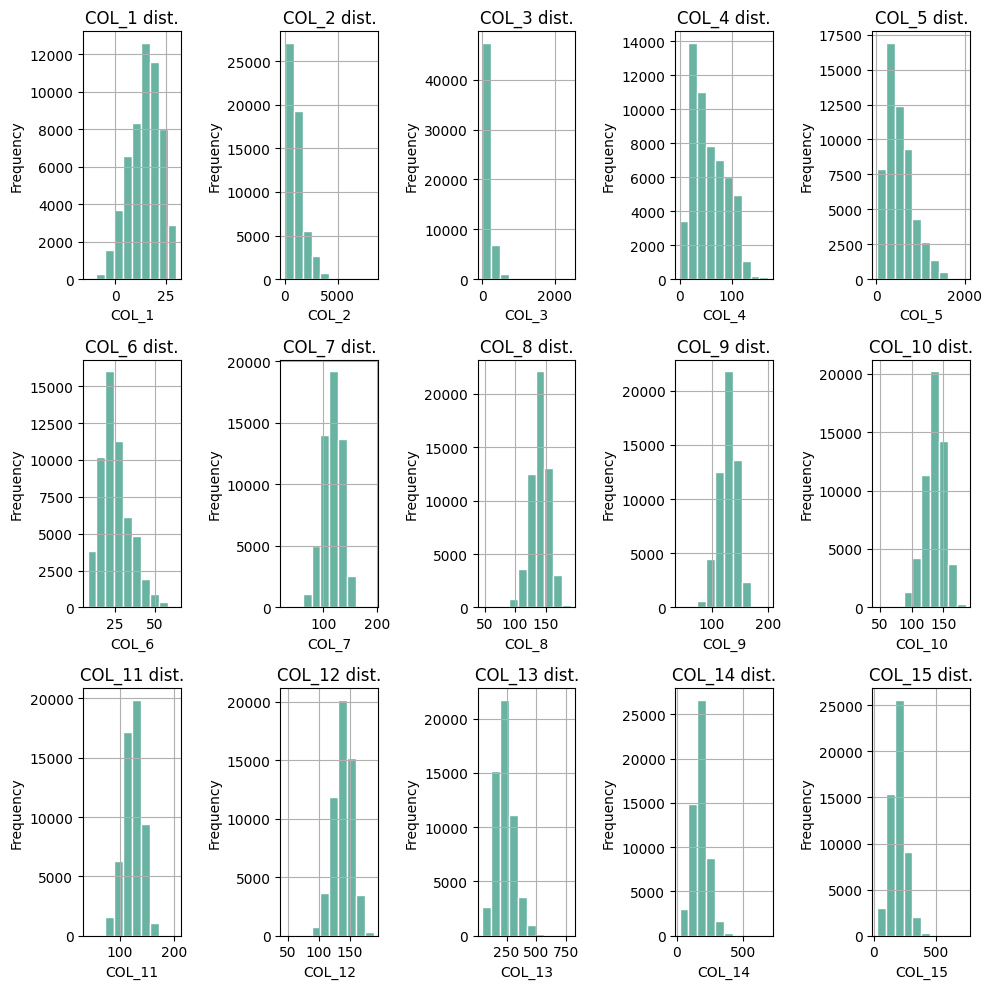

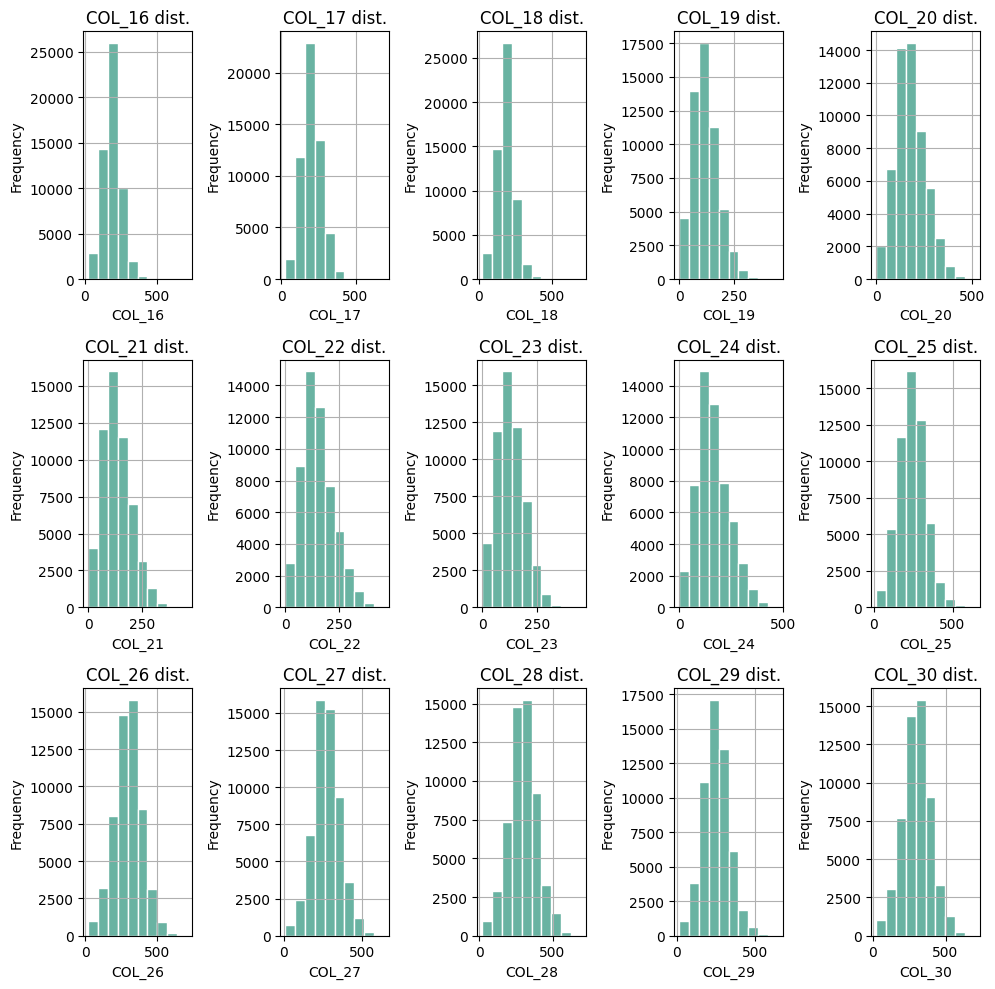

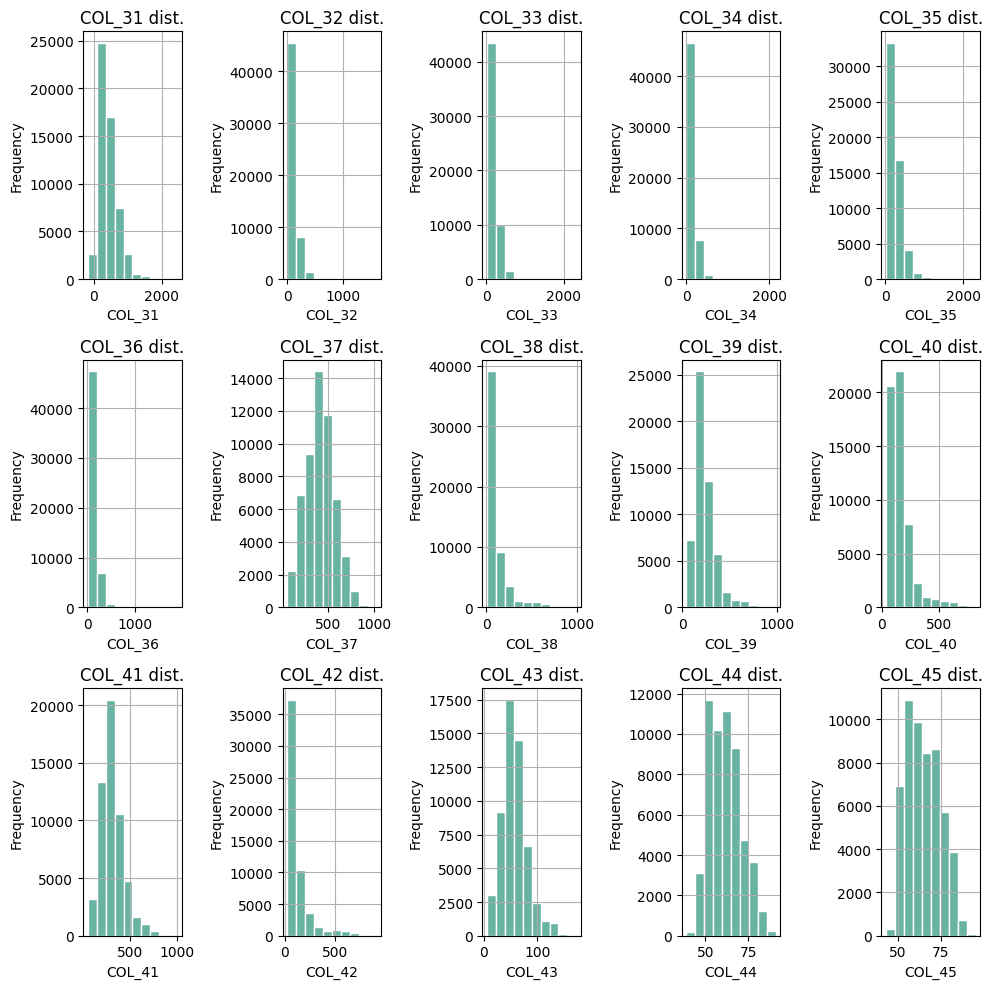

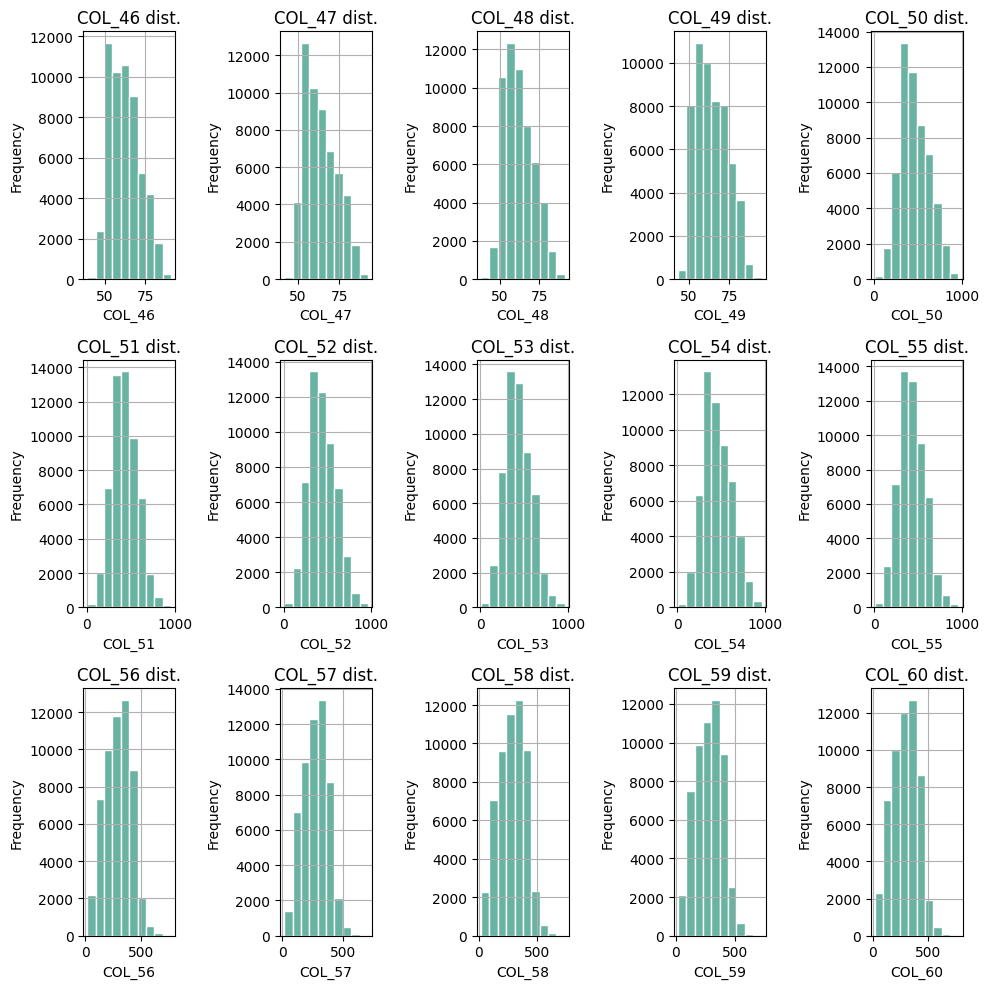

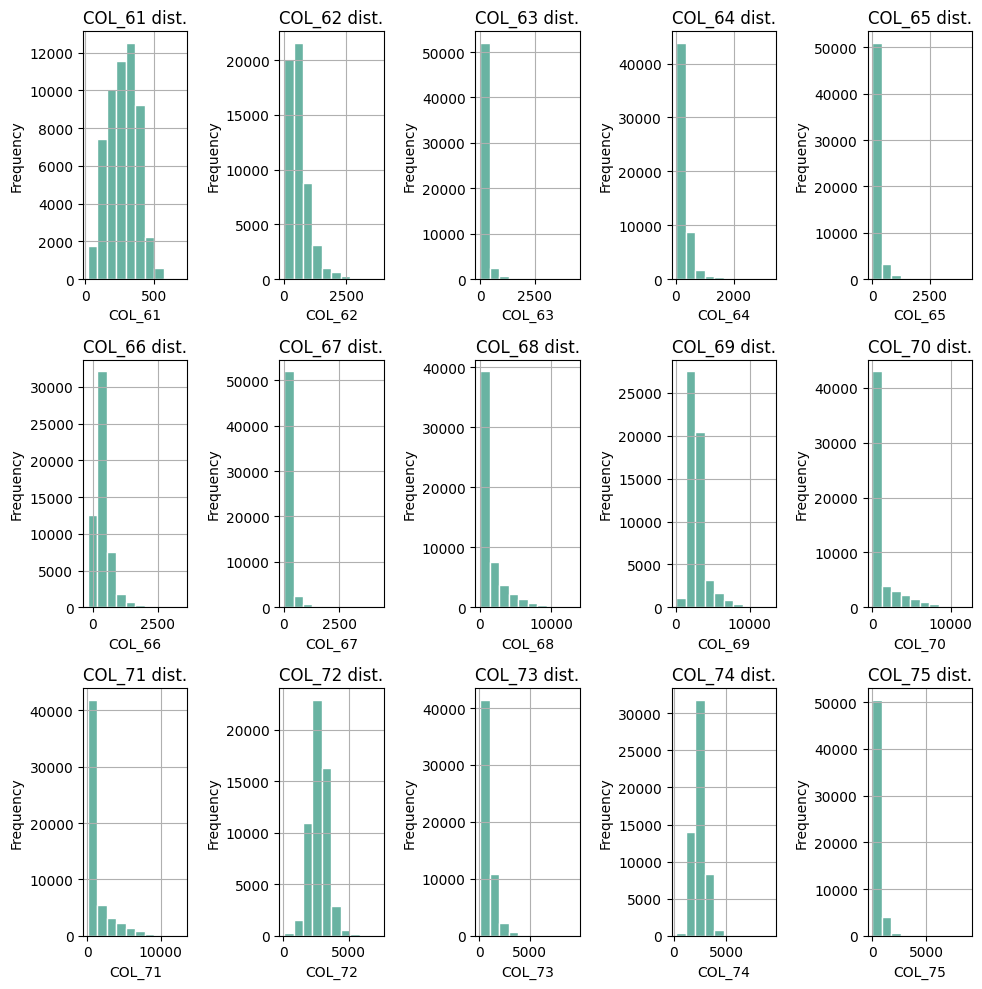

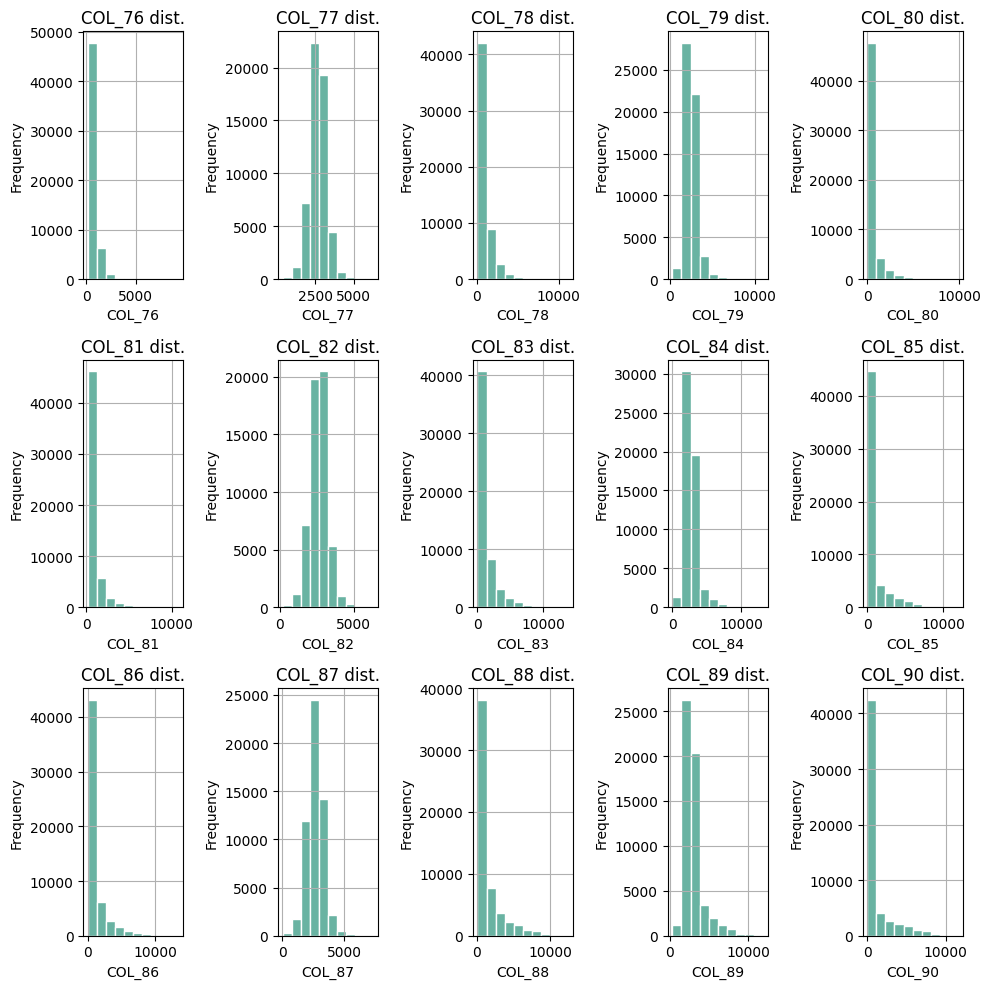

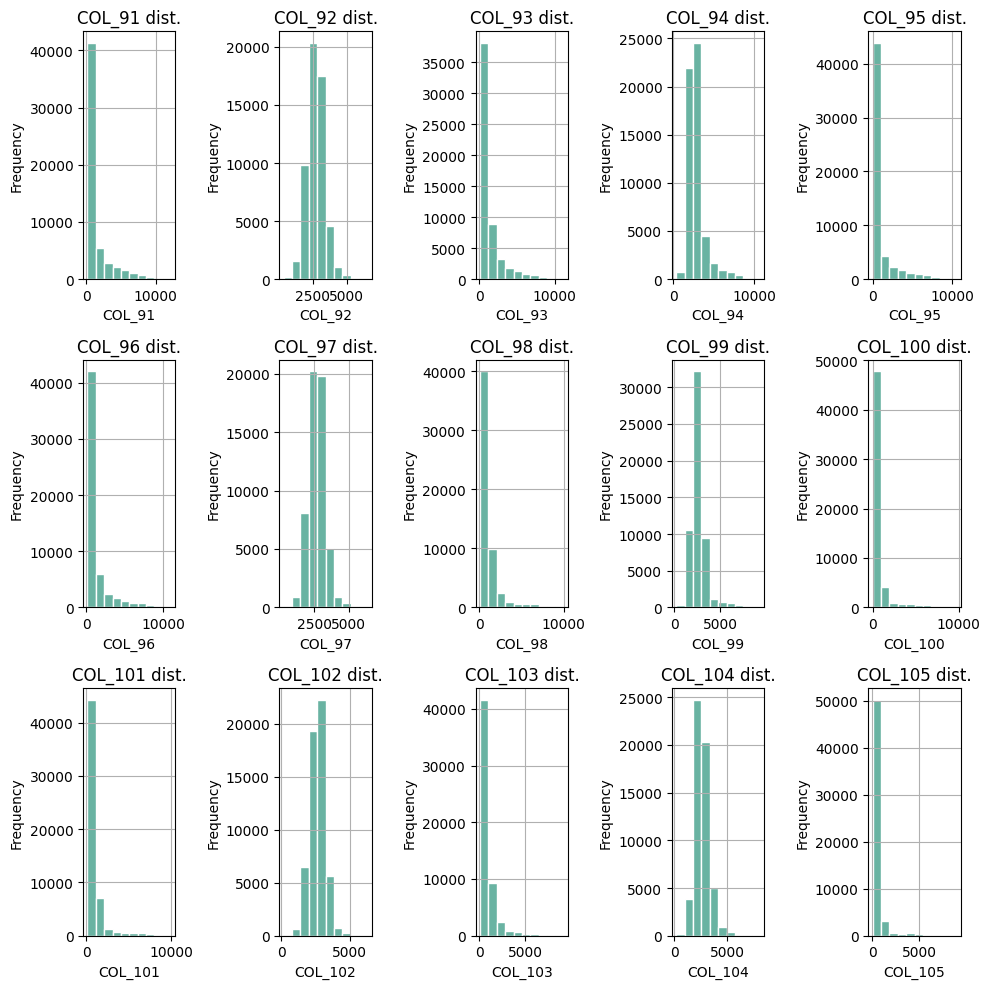

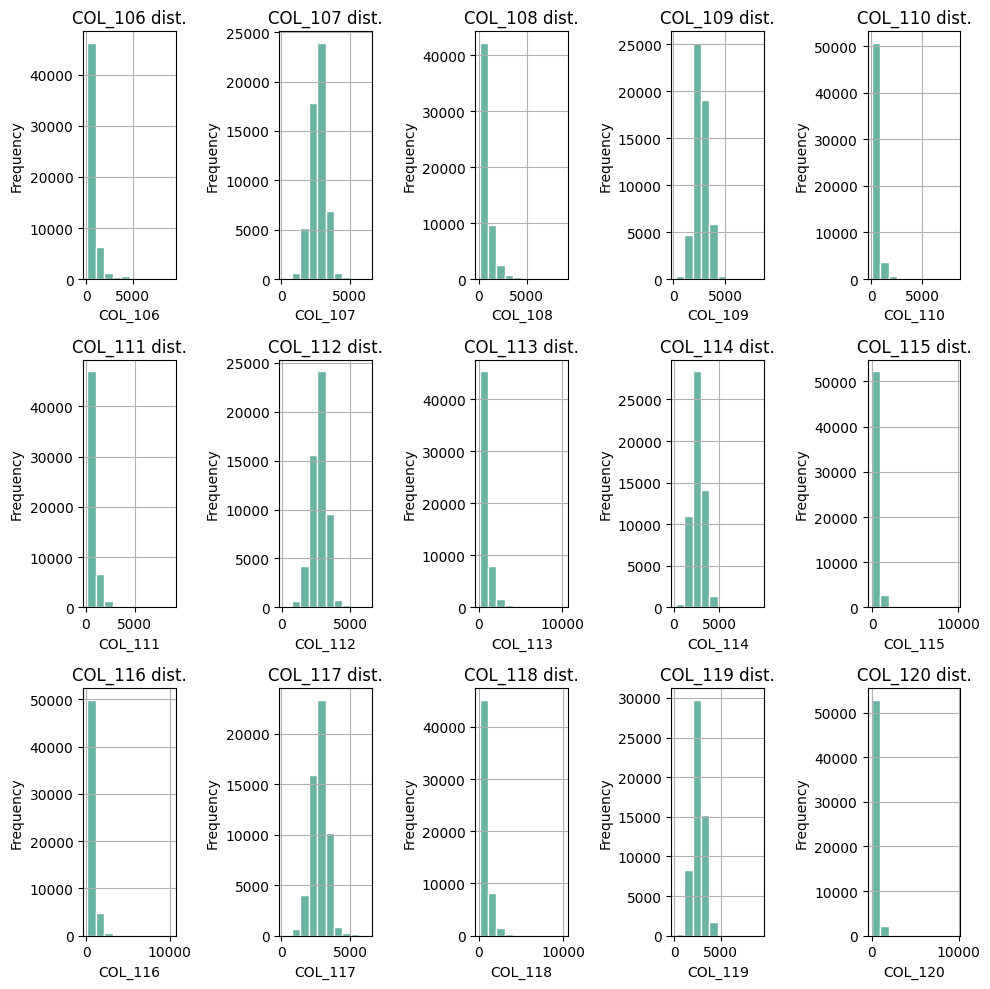

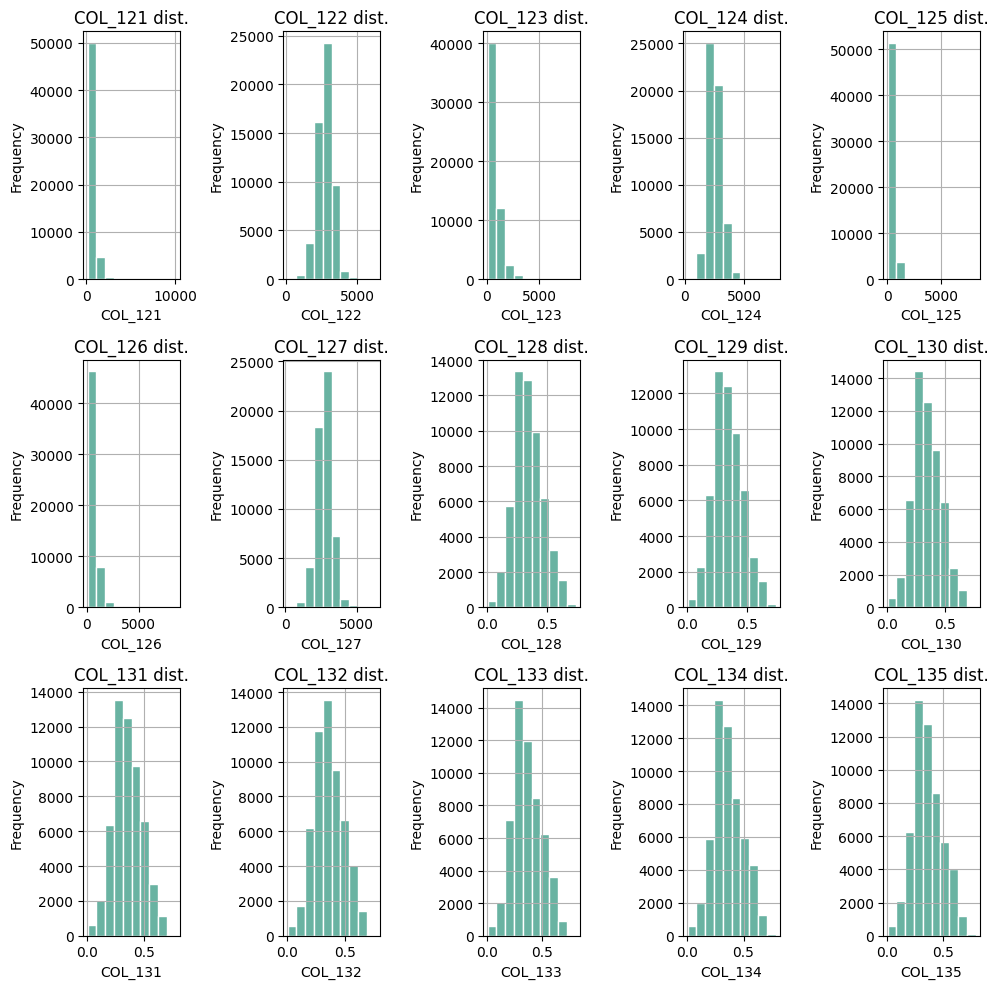

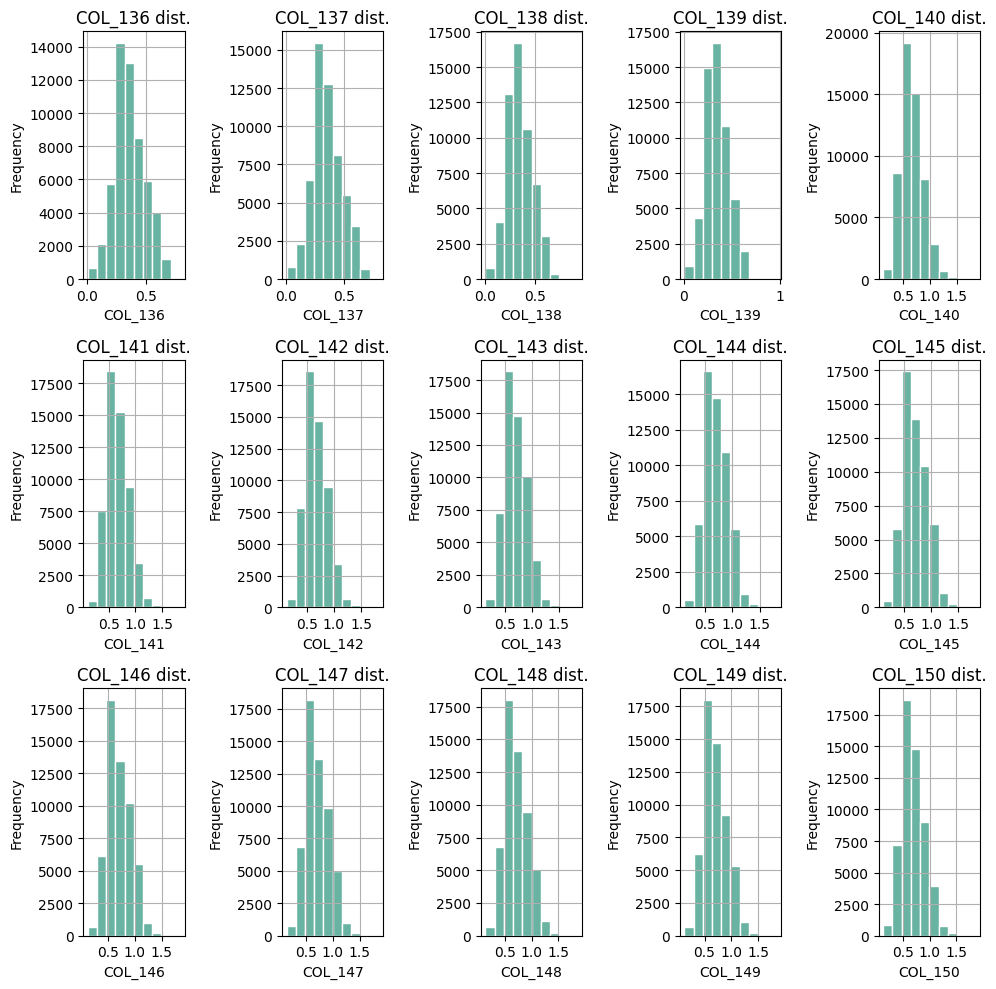

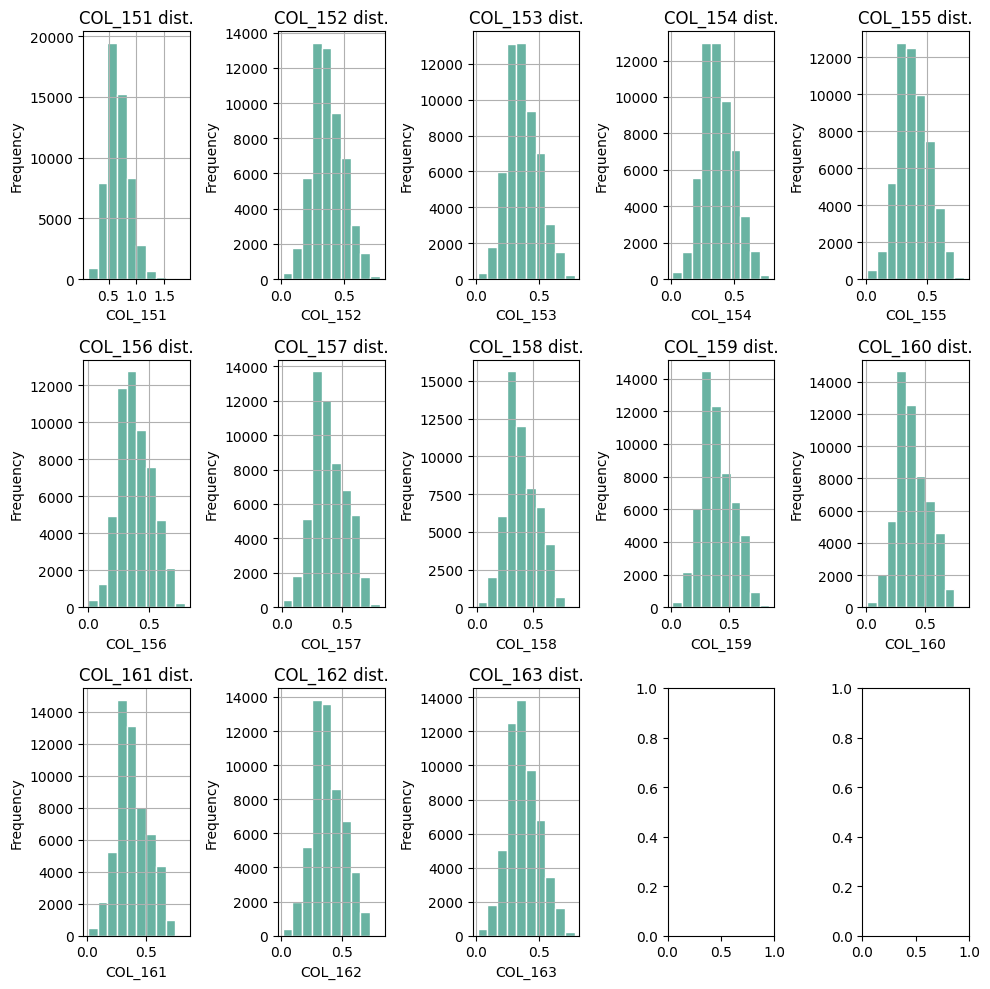

In [35]:
lista_indices = [(1,16),(16,31),(31,46),(46,61),(61,76),(76,91),(91,106),(106,121),(121,136),(136,151),(151,164)]

for i,x in lista_indices:
    gf.plot_hist_columns(df_train,i,x,3,5)

In [58]:
from scipy.stats import skew 

lista_skew = []
for column in list(df_train.columns)[1:164]:
    skew_col = skew(df_train[column], axis = 0, bias = True)
    lista_skew.append(skew_col)

#print(skew(df_test['MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m9'], axis=0, bias=False))

# = 0: se parece más a la normal
# > 0: sesgada a la izq
# < 0: sesgada a la der

max(list(filter(lambda x: x > 1, lista_skew)))

7.853537161715049

(array([62., 41.,  4., 21., 11., 11.,  8.,  2.,  1.,  2.]),
 array([-0.42542869,  0.40246789,  1.23036448,  2.05826107,  2.88615765,
         3.71405424,  4.54195082,  5.36984741,  6.19774399,  7.02564058,
         7.85353716]),
 <BarContainer object of 10 artists>)

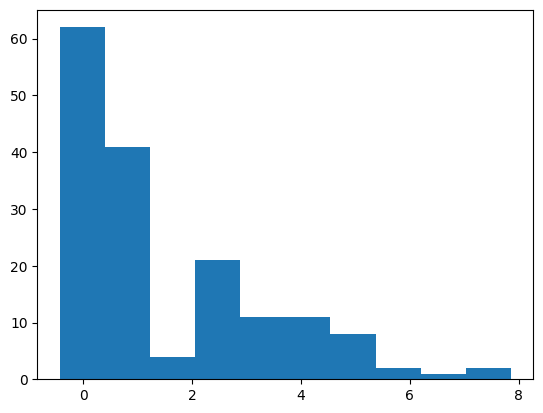

In [59]:
plt.hist(lista_skew)

Después de obtener las gráficas de todas las columnas del conjunto de entrenamiento, podemos obtener las siguientes conclusiones:

1. De manera general, podemos decir que el conjunto de datos pareciera tener 2 tipos de distribuciones aparentes: o bien se comportan de una manera muy parecida a la distribución normal (deseable) o se encuentran sesgadas hacia la izquierda.

2. Después de realizar los cálculos pertinentes, obtuvimos que un total de 100 (61.35%) columnas/variables presentan un coeficiente de sesgo < 1 en valor absoluto, lo cual nos indica que éstas columnas presentan una distribución muy cercana a la normal, un resultado muy deseable ya que, mientras más variables tengamos con ese tipo de distribución, más fácil y mejores serán los cálculos que realicemos

3. Un total de 63 (38.65%) columnas presentan un coeficiente de sesgo mayor a uno, lo cual representa, a su vez, un sesgo hacia la izquierda. Este representa un valor de cierta manera alto ya que es más de una cuarta parte del número de columnas, sin embargo, estos valores de sesgo se encuentran acumulados entre 2 y 6 (histograma de arriba), lo cua nos dice a la vez que no tenemos valores muy alto de sesgo y podría pensarse que es un coeficiente "aceptable" para empezar a trabajar con ellos. El valor máximo de sesgo para el conjunto de datos de entramiento es 7.85, lo cual es un númeron aceptable.

4. No contamos con columnas con un coeficiente de sesgo menor a -1, lo cual nos indica que no tenemos columnas con una distribución sesgada a la derecha.

